<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [537]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.stats as stats
import seaborn as sns

% matplotlib inline

In [538]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])
boston= pd.read_csv('/Users/kaiengwee/Documents/GitHub/GA18Aug/Project3/data/boston_data.csv')

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [539]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [540]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [541]:
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [542]:
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [543]:
X.index

RangeIndex(start=0, stop=506, step=1)

In [544]:
print((X.shape))

(506, 13)


In [545]:
print((y.shape))

(506, 1)


In [546]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [547]:
#['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X.duplicated().sum()

0

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [548]:
# Import, instantiate, fit.
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
type(linreg)

sklearn.linear_model.base.LinearRegression

In [549]:
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [550]:
#linreg.fit(X, y)

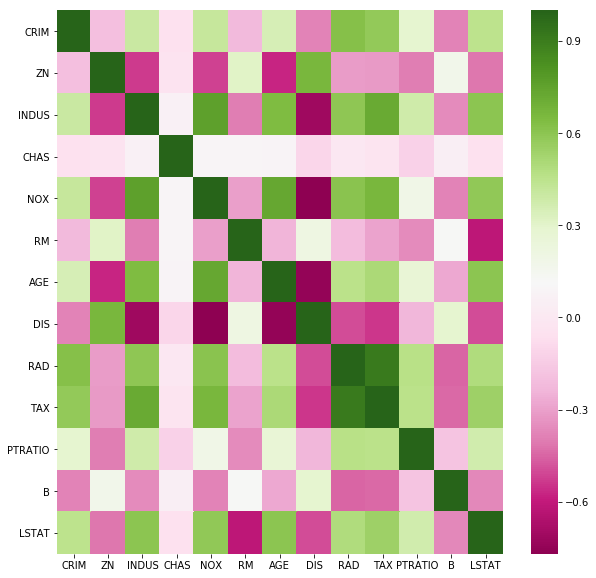

In [551]:
plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(), cmap='PiYG')

In [552]:
# Create a list of features.
feature_cols = ['RM', 'B', 'AGE','DIS','TAX','ZN']
X[feature_cols].corr()

,RM,B,AGE,DIS,TAX,ZN
RM,1.000000,0.128069,-0.240265,0.205246,-0.292048,0.311991
B,0.128069,1.000000,-0.273534,0.291512,-0.441808,0.175520
AGE,-0.240265,-0.273534,1.000000,-0.747881,0.506456,-0.569537
DIS,0.205246,0.291512,-0.747881,1.000000,-0.534432,0.664408
TAX,-0.292048,-0.441808,0.506456,-0.534432,1.000000,-0.314563
ZN,0.311991,0.175520,-0.569537,0.664408,-0.314563,1.000000


In [553]:
feature_cols = ['INDUS', 'B', 'AGE', 'ZN']
X[feature_cols].corr()

,INDUS,B,AGE,ZN
INDUS,1.000000,-0.356977,0.644779,-0.533828
B,-0.356977,1.000000,-0.273534,0.175520
AGE,0.644779,-0.273534,1.000000,-0.569537
ZN,-0.533828,0.175520,-0.569537,1.000000


In [478]:
linreg.fit(test_results, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [479]:
# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

[-28.55446244]
[[ 8.26458888  0.02224221 -0.09119516 -0.66723063]]


### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [480]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse_thirty(df, feature_cols):
    X = df[feature_cols]
    y = df.MEDV
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size= 0.3)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [481]:
# Compare different sets of features.
print(train_test_rmse_thirty(boston, ['RM', 'B', 'AGE', 'DIS']))

6.7875117665416855


In [482]:
# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse_ten(df, feature_cols):
    X = df[feature_cols]
    y = df.MEDV
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size= 0.1)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [483]:

# Compare different sets of features.
print(train_test_rmse_ten(boston, ['RM', 'B', 'AGE', 'DIS']))

8.399224689152975


### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [484]:
from sklearn import model_selection

In [485]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [486]:
mse_values = []
scores = []
n = 0
#X = df[feature_cols]

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(test_results, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(np.sqrt(mse_values[n-1])))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(np.sqrt(mse_values))))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))



~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 23.072989234416305
RMSE: 4.803435149392183
R2: 0.7385482622751953

Model 2
MSE: 20.690889977204087
RMSE: 4.548723994397119
R2: 0.7392816622067712

Model 3
MSE: 19.628389032488563
RMSE: 4.4303937784906395
R2: 0.736311000647873

Model 4
MSE: 29.166906751204994
RMSE: 5.400639476136599
R2: 0.7381887081671217

Model 5
MSE: 25.618169506476033
RMSE: 5.06143946980264
R2: 0.7386733561129387

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 23.635468900358
Mean of RMSE for all folds: 4.848926373643836
Mean of R2 for all folds: 0.73820059788198


In [487]:
kf = model_selection.KFold(n_splits=10, shuffle=True)

In [488]:
mse_values = []
scores = []
n = 0
#X = df[feature_cols]

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(test_results, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(np.sqrt(mse_values[n-1])))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(np.sqrt(mse_values))))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 33.105015118592384
RMSE: 5.753695779113837
R2: 0.7392178701189929

Model 2
MSE: 19.132301165095697
RMSE: 4.374048601135531
R2: 0.7396398158351891

Model 3
MSE: 28.282377950087437
RMSE: 5.318117895467102
R2: 0.7381313415882098

Model 4
MSE: 20.26859080631523
RMSE: 4.502065171264764
R2: 0.739851331001819

Model 5
MSE: 14.731575407067863
RMSE: 3.838173446714969
R2: 0.7399405476445923

Model 6
MSE: 22.692697563141824
RMSE: 4.763685292202018
R2: 0.7394140693471335

Model 7
MSE: 26.61926280915413
RMSE: 5.15938589457642
R2: 0.739350975878495

Model 8
MSE: 22.03530021660579
RMSE: 4.694177267275469
R2: 0.7395126448035033

Model 9
MSE: 28.7778864266081
RMSE: 5.364502439798876
R2: 0.7385999609537036

Model 10
MSE: 26.11654281449562
RMSE: 5.110434699171453
R2: 0.7379756268265528

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 24.17615502771641
Mean of RMSE for all folds: 4.887828648672044
Mean of R2 for all folds: 0.73916341839981

# KNN Practice

In [489]:
# Read the iris data into a DataFrame
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
#iris = pd.read_csv(url, header=None, names=col_names)
iris = pd.read_csv(url)

In [490]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [491]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [492]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [493]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

iris['species_num'] = iris.species.map({'setosa':0, 'versicolor':1, 'virginica':2})


In [494]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [495]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


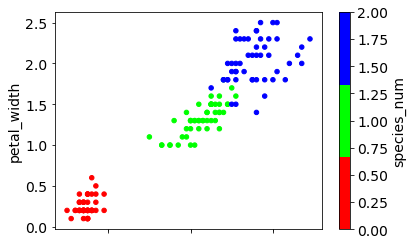

In [496]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold);

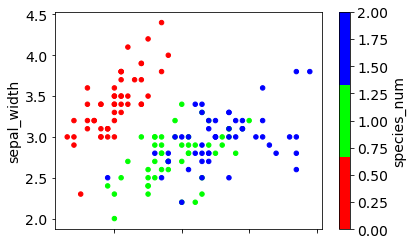

In [497]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold);

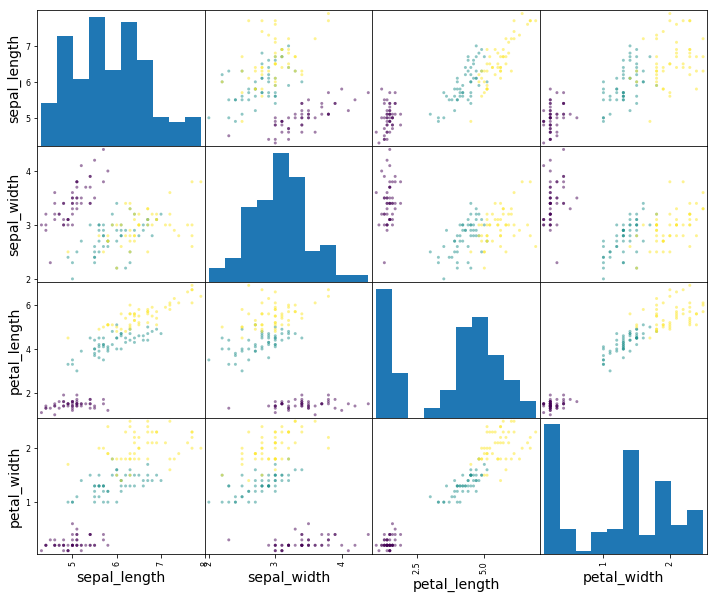

In [498]:
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10));

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [499]:
# Create feature matrix (X).
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[col_names]
print(X.head())
X.shape

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


(150, 4)

### Create your target vector "y"
This will be the species type.

In [500]:
y= iris.species_num
print(y.head())
y.shape

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64


(150,)

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [501]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [503]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [504]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9210526315789473


### Create a Model With Five Neighbors. Did it Improve?

In [505]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9210526315789473


### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [506]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

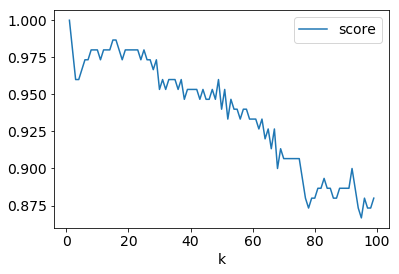

In [507]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

It predicts the probability of a data point associated with different classes.

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [508]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.stats as stats
import seaborn as sns

% matplotlib inline

In [509]:
# First, format our data in a DataFrame

boston= load_boston()
#boston= pd.read_csv('/Users/kaiengwee/Documents/GitHub/GA18Aug/Project3/data/boston_data.csv')
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [510]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sat, 22 Sep 2018   Prob (F-statistic):          1.59e-321
Time:                        21:18:44   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

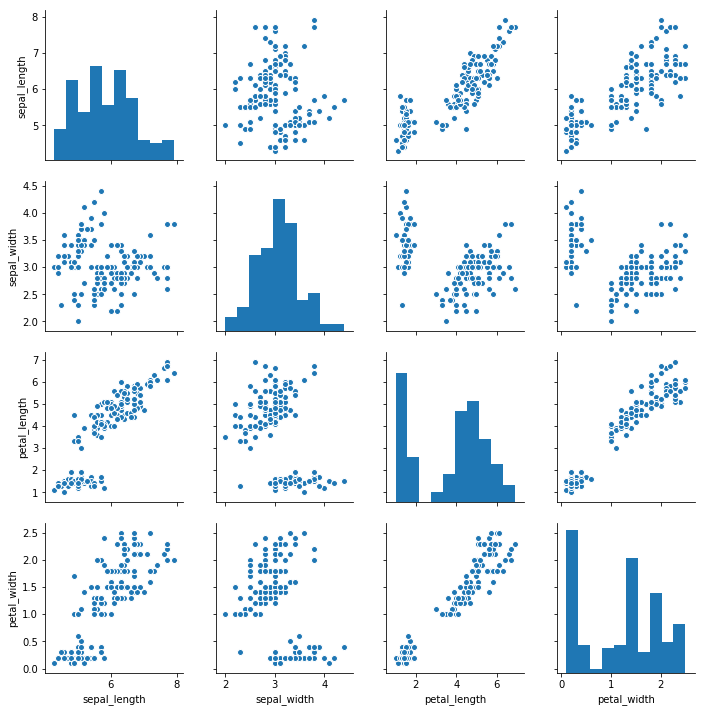

In [511]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [563]:
# Check out Pearson scores
from scipy.stats.stats import pearsonr

data = {'list 1':[2,4,6,8],'list 2':[4,16,36,64]}

import pandas as pd #To Convert your lists to pandas data frames convert your lists into pandas dataframes

df = pd.DataFrame(data, columns = ['list 1','list 2'])

from scipy import stats # For in-built method to get PCC

pearson_coef, p_value = stats.pearsonr(df["list 1"], df["list 2"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

Pearson Correlation Coefficient:  0.9843740386976972 and a P-value of: 0.015625961302302763


## Demo: Patsy

In [513]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [514]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/kaiengwee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [515]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.1260314410445985
